# Dataset exploration

## Loading Data

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import japanese_utils as jp_utils
import matplotlib.font_manager as fm
fprop = fm.FontProperties(fname='../fonts/noto_sans_jp/NotoSansJP-Regular.otf')

fe = fm.FontEntry(
    fname='../fonts/noto_sans_jp/NotoSansJP-Regular.otf',
    name='NotoSansJp'
)
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams['font.family'] = fe.name

plt.rcParams.update({'font.sans-serif':'NotoSansJp'})
plt.rcParams.update({'font.family':'NotoSansJp'})


# To reset to default
#plt.rcdefaults()


In [2]:
df = pd.read_csv("../final_data/japanese_characters.csv")
df.head()

,character,filepath,source
0,I,final_data/char_images/0x0049/etl1_027062.png,ETL1
1,I,final_data/char_images/0x0049/etl1_027076.png,ETL1
2,I,final_data/char_images/0x0049/etl1_026368.png,ETL1
3,I,final_data/char_images/0x0049/etl1_026340.png,ETL1
4,I,final_data/char_images/0x0049/etl1_026426.png,ETL1


In [3]:
chars = df['character']

## Checking data

In [4]:
def show_df_img(df, char_index, path_prefix='../'):
    complete_path = path_prefix + df.iloc[char_index]['filepath']
    img = plt.imread(complete_path)
    plt.imshow(img);

In [5]:
char_index = 100000
ku = chars[char_index]
print(ku)

ク


The `char_index=1000` character should a "ク". We can visualize its image to make sure that we didn't mess up at some point

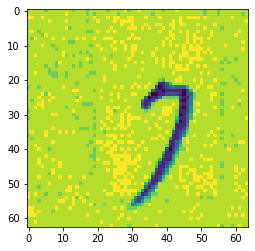

In [6]:
show_df_img(df, char_index)

## Preprocessing

We will now cut our dataframe into 3 separate ones:
- kanji
- hiragana
- katakana

This division represents the main three alphabets existing in the japanese language. We will ignore the romaji (latin letters) for the time being as it is not japanese specific. 

In [7]:
df['is_hiragana'] = df['character'].apply(lambda x: type(x) == str and jp_utils.is_hiragana_full(x))
df['is_hiragana'].value_counts()

False    1102703
True       71501
Name: is_hiragana, dtype: int64

In [8]:
df['is_katakana'] = df['character'].apply(lambda x: type(x) == str and jp_utils.is_katakana_full(x))
df['is_katakana'].value_counts()

False    1026955
True      147249
Name: is_katakana, dtype: int64

In [9]:
df['is_kanji'] = df['character'].apply(lambda x: type(x) == str and jp_utils.is_kanji(x))
df['is_kanji'].value_counts()

True     782561
False    391643
Name: is_kanji, dtype: int64

In [10]:
hiragana_df = df[df['is_hiragana']]
katakana_df = df[df['is_katakana']]
kanji_df = df[df['is_kanji']]

## Distribution

In [44]:
hir_counts = hiragana_df['character'].value_counts()
hir_counts

゚    2083
゙    2083
う    1341
い    1341
え    1341
     ... 
っ     161
ゅ     161
ゃ     161
ぃ     120
ぇ     120
Name: character, Length: 79, dtype: int64

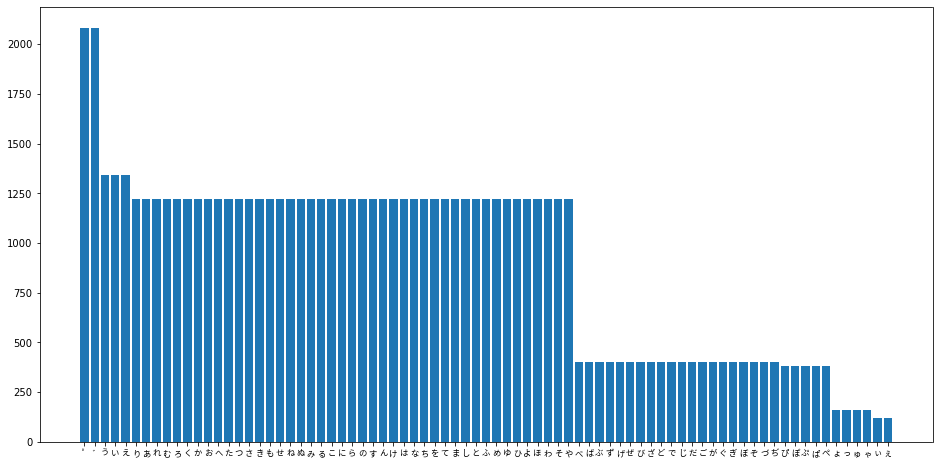

In [41]:
plt.figure(figsize=(16, 8))
plt.bar(range(len(hir_counts)), hir_counts.values, align='center')
plt.xticks(range(len(hir_counts)), hir_counts.index.values, size='small')
plt.show()

### Katakana

In [43]:
kat_counts = katakana_df['character'].value_counts()
kat_counts

エ    4633
ウ    4633
イ    4633
ラ    3014
マ    3014
     ... 
ギ      20
ブ      20
パ      20
ヂ      20
・      12
Name: character, Length: 74, dtype: int64

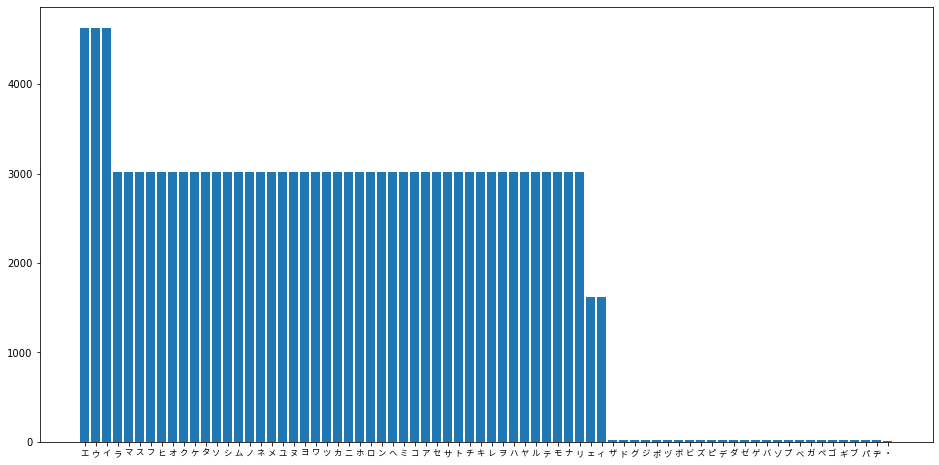

In [45]:
plt.figure(figsize=(16, 8))
plt.bar(range(len(kat_counts)), kat_counts.values, align='center')
plt.xticks(range(len(kat_counts)), kat_counts.index.values, size='small')
plt.show()

# TODO Later

/Users/jpec/opt/anaconda3/envs/kanji/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12477 (\N{KATAKANA LETTER SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jpec/opt/anaconda3/envs/kanji/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12459 (\N{KATAKANA LETTER KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jpec/opt/anaconda3/envs/kanji/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12504 (\N{KATAKANA LETTER HE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jpec/opt/anaconda3/envs/kanji/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12511 (\N{KATAKANA LETTER MI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jpec/opt/anaconda3/envs/kanji/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12467 (\N{KATAK

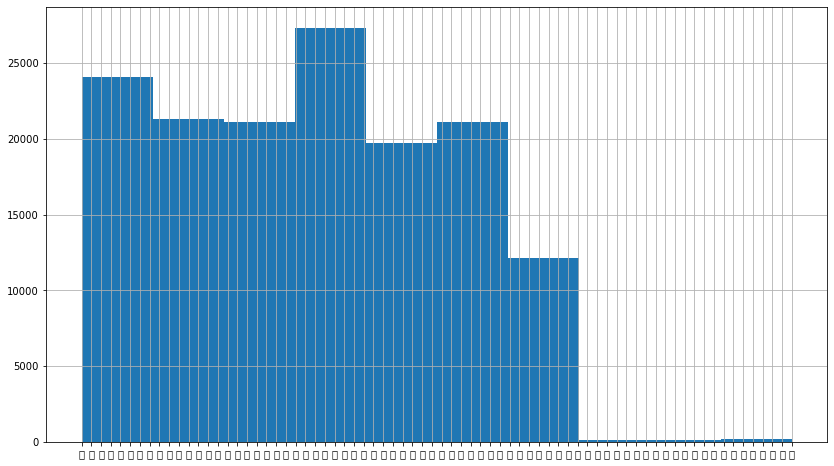

In [22]:
from matplotlib.font_manager import FontProperties
prop = FontProperties()

plt.figure(figsize=(14, 8))
#plt.hist(katakana_df['character'])
#plt.show();
katakana_df['character'].hist();

### Kanji

In [53]:
kanjis_count = kanji_df['character'].value_counts()[-50:]

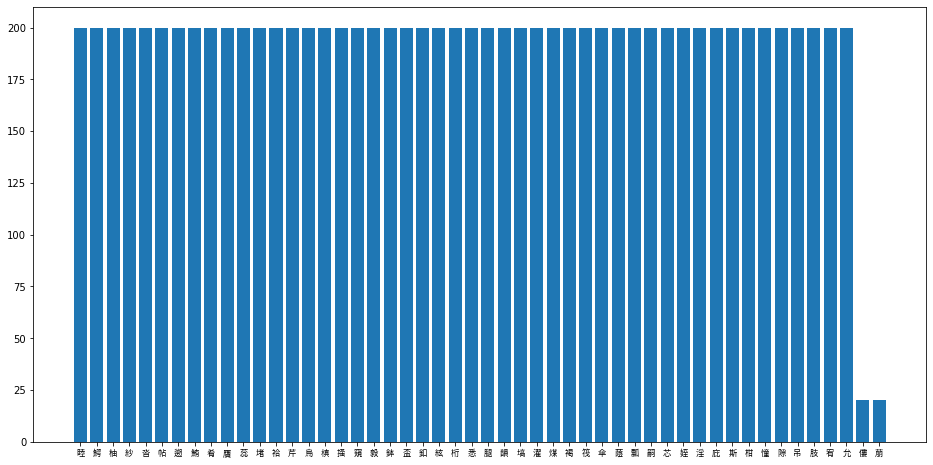

In [54]:
plt.figure(figsize=(16, 8))
plt.bar(range(len(kanjis_count)), kanjis_count.values, align='center')
plt.xticks(range(len(kanjis_count)), kanjis_count.index.values, size='small')
plt.show()